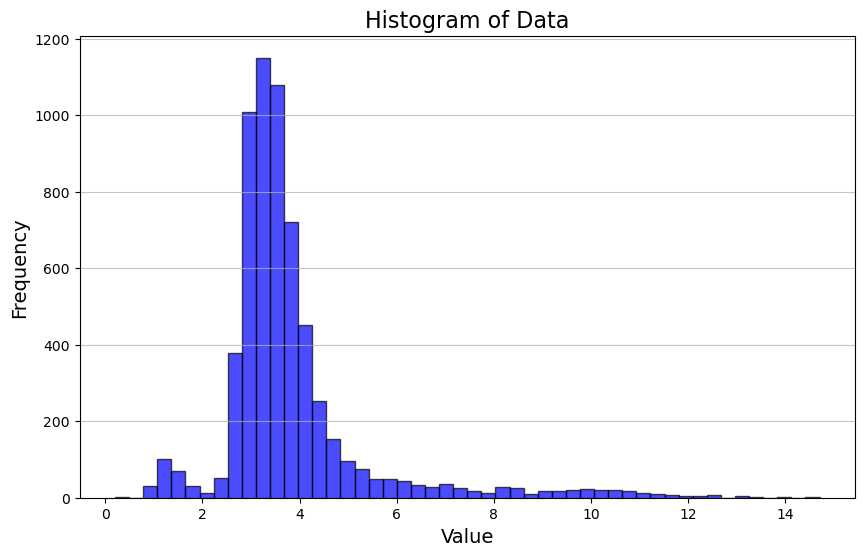

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a large 1D numpy array (example)
data1 = np.load("C:\\Users\\hp\\Desktop\\Sonuçlar\\fwhmtugog.npy")
data2 = np.load("C:\\Users\\hp\\Desktop\\Sonuçlar\\fwhmtugpred.npy")

mask = (data1 < 0) | (data1 > 15) | (data2 < 0) | (data2 > 15)

# Apply the mask to all arrays and remove the corresponding elements
data1 = data1[~mask]
data2 = data2[~mask]

# Replace this with your array

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data1, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Data', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

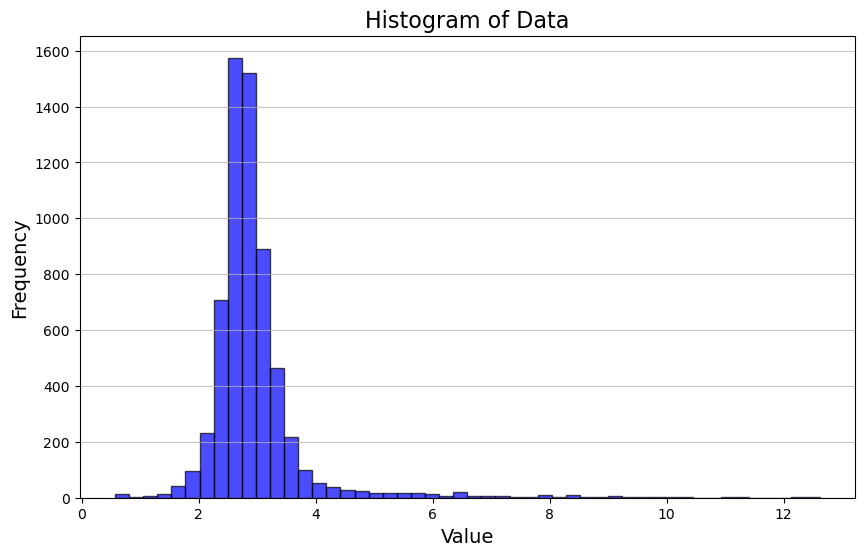

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Data', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

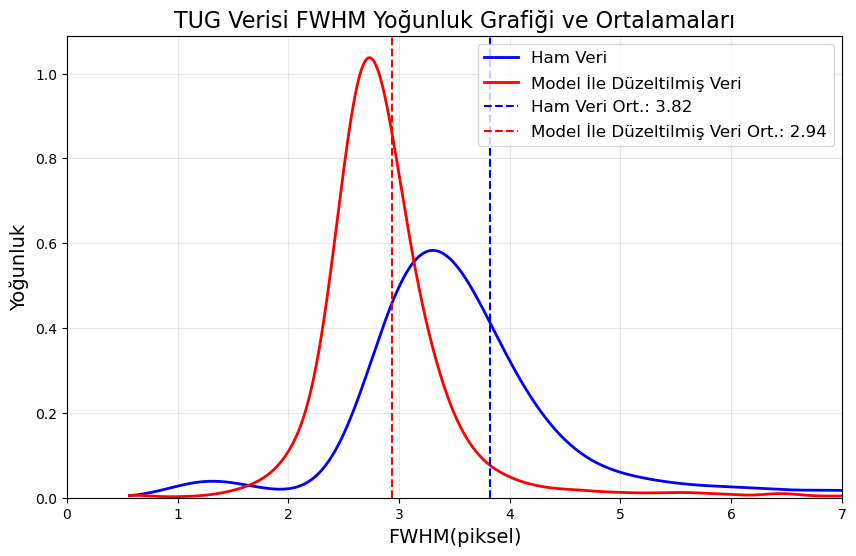

In [4]:
from scipy.stats import gaussian_kde


kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)

# Define the x-axis range for all curves
x = np.linspace(max(0, data1.min(), data2.min()), 
                max(data1.max(), data2.max()) -7, 1000)

# Evaluate KDEs
y1 = kde1(x)
y2 = kde2(x)

# Compute means of the data
mean1 = np.mean(data1)
mean2 = np.mean(data2)

# Plot the distribution curves
plt.figure(figsize=(10, 6))
plt.plot(x, y1, color='blue', lw=2, label='Ham Veri')
plt.plot(x, y2, color='red', lw=2, label='Model İle Düzeltilmiş Veri')

# Plot vertical lines at the means
plt.axvline(mean1, color='blue', linestyle='--', label=f'Ham Veri Ort.: {mean1:.2f}')
plt.axvline(mean2, color='red', linestyle='--', label=f'Model İle Düzeltilmiş Veri Ort.: {mean2:.2f}')

# Set the limits to only show values above zero
plt.xlim(left=0, right=7)  # x-axis starts from 0
plt.ylim(bottom=0)  # y-axis starts from 0
plt.xticks(np.arange(0, int(np.max(x)) + 1, 1))  # From 0 to max(x) with a step of 1
# Add titles and labels
plt.title('TUG Verisi FWHM Yoğunluk Grafiği ve Ortalamaları', fontsize=16)
plt.xlabel('FWHM(piksel)', fontsize=14)
plt.ylabel('Yoğunluk', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

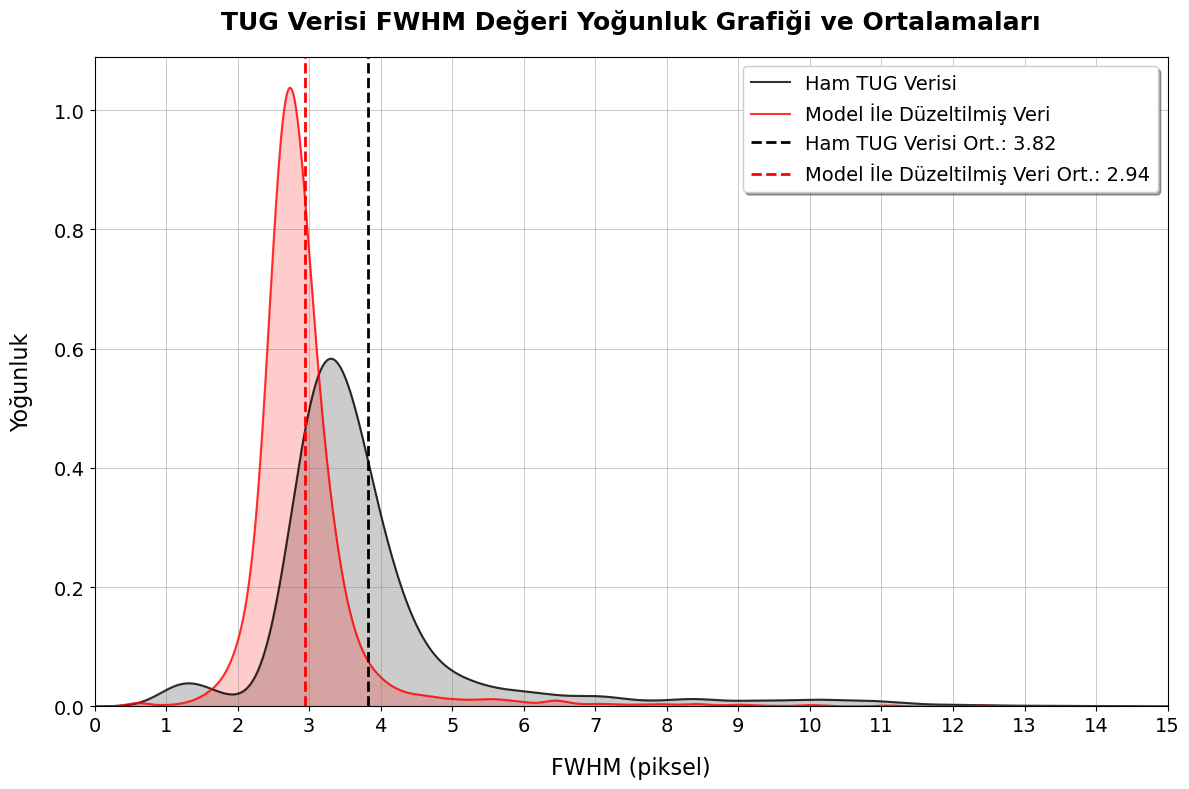

In [12]:
x = np.linspace(0, 15, 1000)

# KDE değerlendirme
y1 = kde1(x)
y2 = kde2(x)

# Ortalama değerler
mean1 = np.mean(data1)
mean2 = np.mean(data2)

# Grafik oluşturma
plt.figure(figsize=(12, 8))

# KDE eğrileri
plt.plot(x, y1, color='black', lw=1.5, label='Ham TUG Verisi', alpha=0.8)
plt.fill_between(x, y1, color='black', alpha=0.2)
plt.plot(x, y2, color='red', lw=1.5, label='Model İle Düzeltilmiş Veri', alpha=0.8)
plt.fill_between(x, y2, color='red', alpha=0.2)


# Ortalama çizgileri
plt.axvline(mean1, color='black', linestyle='--', lw=2, label=f'Ham TUG Verisi Ort.: {mean1:.2f}')
plt.axvline(mean2, color='red', linestyle='--', lw=2, label=f'Model İle Düzeltilmiş Veri Ort.: {mean2:.2f}')

# Görsel detaylar
plt.title('TUG Verisi FWHM Değeri Yoğunluk Grafiği ve Ortalamaları', fontsize=18, weight='bold', pad=20)
plt.xlabel('FWHM (piksel)', fontsize=16, labelpad=15)
plt.ylabel('Yoğunluk', fontsize=16, labelpad=15)
plt.xticks(range(0, 16), fontsize=14)  # X ekseninde 1-15 arası tamsayılar
plt.yticks(fontsize=14)
plt.xlim(0, 15)  # X ekseni 1 ile 15 arasında sınırlandırıldı
plt.ylim(bottom=0)  # Y ekseni başlangıcı 0

# Gri arka plan grid
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.6)

# Legend
plt.legend(fontsize=14, loc='upper right', frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.savefig("C:\\Users\\hp\\Desktop\\TUG_Test_FWHM.png", dpi = 300)
# Grafik gösterimi
plt.show()